# Project

Machine Learning and Statistics

Winter 2023/24

by Anthony McGarry

***

> Explain in what supervised learning is and then explain what classification algorithms are.

## __Supervised Learning__

Supervised learning is a type of machine learning where the algorithm is trained on a labeled dataset. In a labeled dataset, each training example consists of an input (or feature) and the corresponding desired output (or label). The goal of supervised learning is to learn a mapping from inputs to outputs so that the algorithm can make accurate predictions on new, unseen data.

The process of supervised learning typically involves the following steps:

__Data Collection:__ Gather a dataset that contains examples with both input features and their corresponding labels.

__Data Preprocessing:__ Clean and prepare the data for training. This may involve handling missing values, normalizing features, or encoding categorical variables.

__Splitting the Data:__ Divide the dataset into two subsets - a training set used for training the model and a testing set used for evaluating the model's performance on unseen data.

__Model Training:__ Choose a specific supervised learning algorithm (such as regression or classification algorithms) and train the model on the training data. The model learns the relationship between inputs and outputs.

__Model Evaluation:__ Assess the model's performance on the testing set to estimate how well it will generalize to new, unseen data. Common evaluation metrics include accuracy, precision, recall, and F1-score.

__Prediction:__ Once the model is trained and evaluated, it can be used to make predictions on new, unlabeled data.

## __Classification Algorithms__

Classification is a type of supervised learning where the goal is to predict the categorical class labels of new instances based on past observations. In classification, the output variable is a category, such as 'spam' or 'not spam,' 'positive' or 'negative,' or 'iris species.'

Several classification algorithms exist, each with its strengths and weaknesses. Some common classification algorithms include:

__Logistic Regression:__ Despite its name, logistic regression is a linear model for binary classification that predicts the probability of an instance belonging to a particular class.

__Support Vector Machines (SVM):__ SVM is a powerful algorithm that finds the hyperplane that best separates data points of different classes. It can handle both linear and non-linear classification tasks.

__Decision Trees:__ Decision trees partition the feature space into regions and assign a label to each region. They are interpretable and can handle both classification and regression tasks.

__Random Forest:__ Random Forest is an ensemble method that constructs multiple decision trees during training and outputs the mode of the classes as the prediction.

__K-Nearest Neighbors (KNN):__ KNN classifies a data point based on the majority class of its k-nearest neighbors in the feature space.

__Naive Bayes:__ Naive Bayes is a probabilistic algorithm that applies Bayes' theorem with the assumption that features are conditionally independent. It is often used in text classification tasks.

__Neural Networks:__ Deep learning neural networks, especially deep feedforward networks and convolutional neural networks (CNNs), are powerful models capable of learning intricate patterns and representations for complex classification tasks.

Each classification algorithm has its own assumptions, advantages, and limitations. The choice of which algorithm to use depends on the characteristics of the data and the specific requirements of the task at hand. It's common to experiment with multiple algorithms and evaluate their performance to determine the most suitable approach for a particular problem.

Describe at least one common classification algorithm and implement it using the scikit-learn Python library

In [93]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [94]:
# Load the Iris dataset
iris = load_iris()

# Create a DataFrame
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Display the first few rows of the dataset
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [95]:
# Summary statistics
summary_stats = iris_df.describe()

# Display summary statistics
summary_stats

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


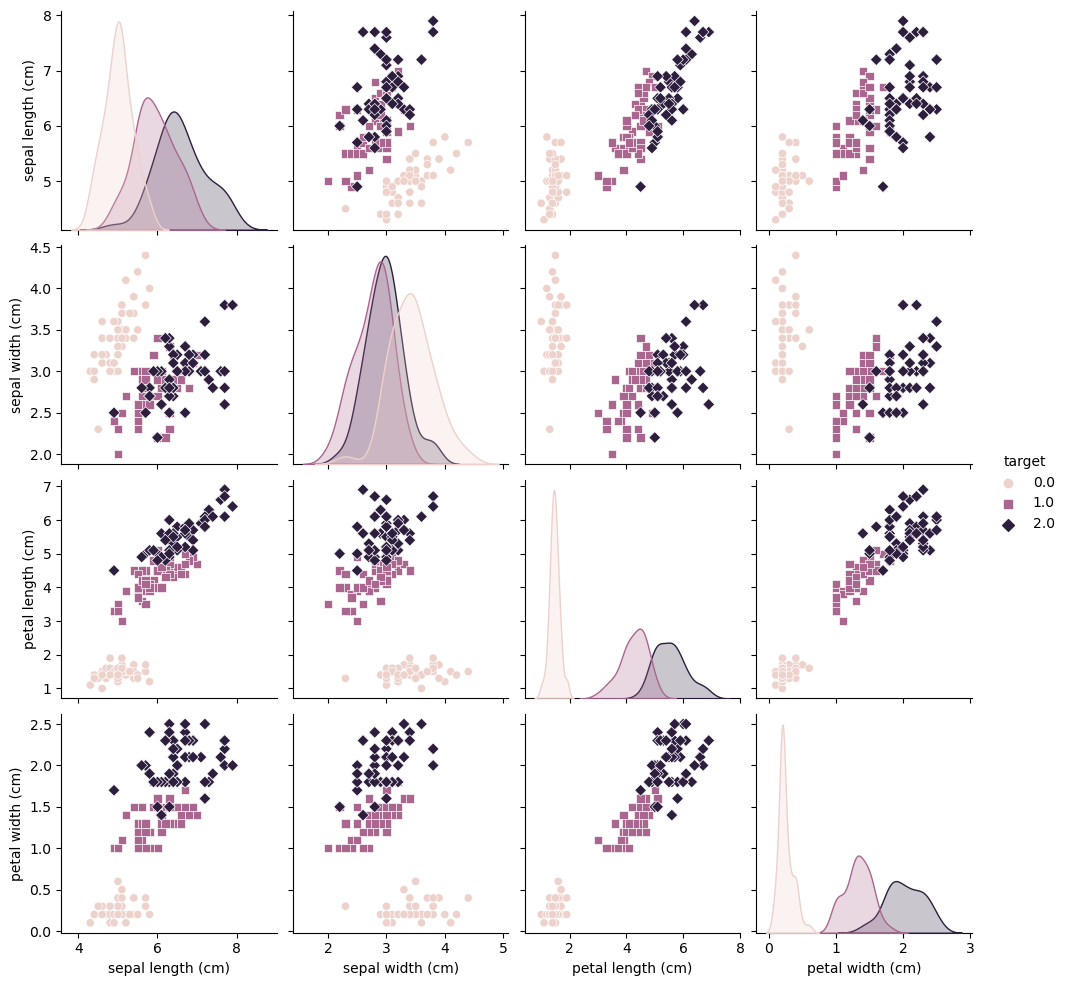

In [96]:
# Pairplot for visualization
sns.pairplot(iris_df, hue='target', markers=['o', 's', 'D'])
plt.show()

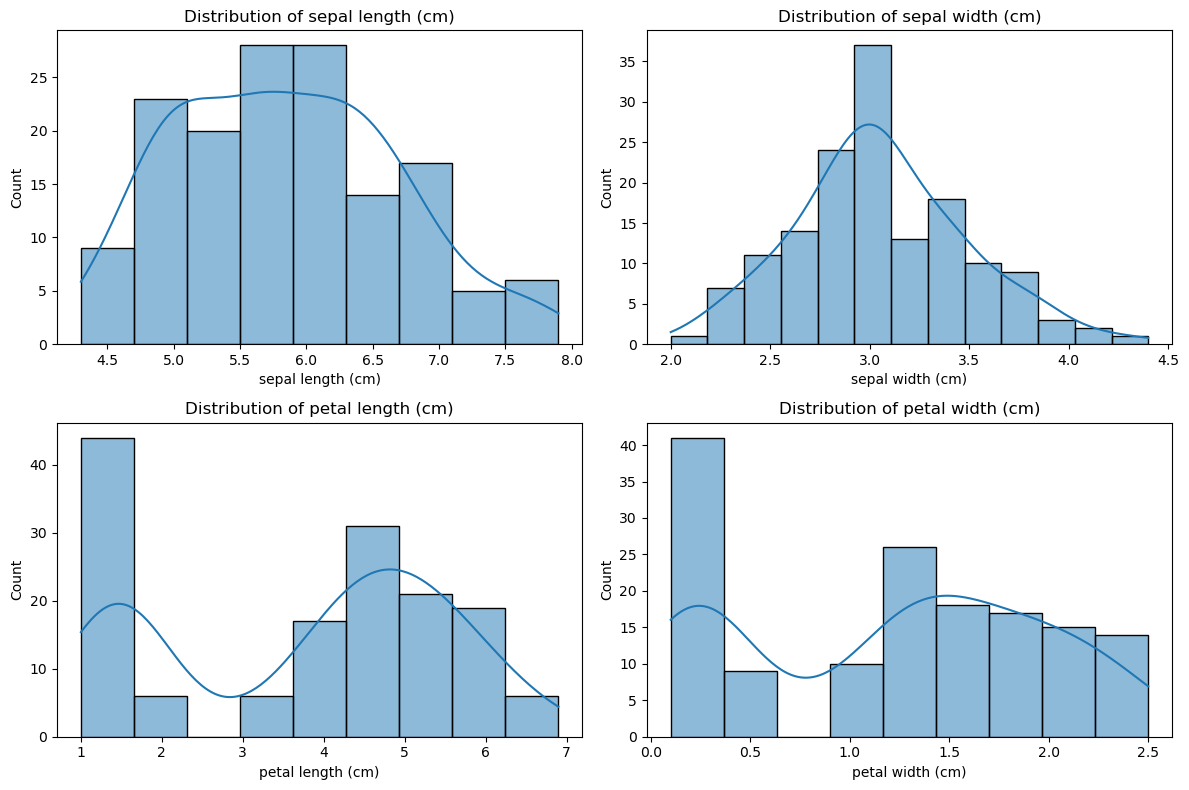

In [97]:
# Distribution of individual features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris['feature_names']):
    plt.subplot(2, 2, i+1)
    sns.histplot(iris_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

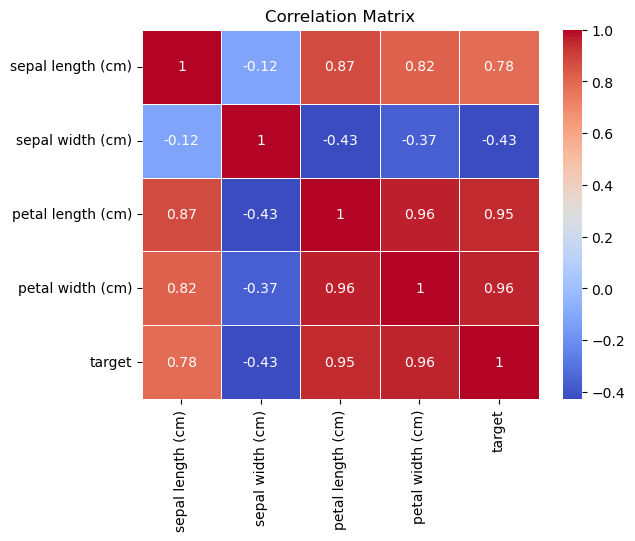

In [98]:
# Correlation matrix
correlation_matrix = iris_df.corr()

# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

__Random Forest Classifier__

In [99]:
#Creates a DataFrame using NumPy to concatenate the feature data and target labels
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Separate the features (X) and the target labels (y)
X = iris_df.drop('target', axis=1)
y = iris_df['target']

# Use train_test_split from scikit-learn to split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Standardises the features using StandardScaler to ensure that all features have the same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Classifier and trains it on the standardised training data.
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n', classification_rep)


Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



__Logistic Regression__

Logistic Regression, despite its name, is a classification algorithm designed for binary outcomes. It predicts the probability of an instance belonging to a specific class by applying a logistic function, also known as the sigmoid function, to a linear combination of input features. This mathematical transformation ensures that the output remains within a range of probabilities, making it suitable for classification tasks rather than regression.

$$ f_{x} = \frac{1}{1+e^-1} $$

In [100]:
# Generate a synthetic dataset for illustration
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

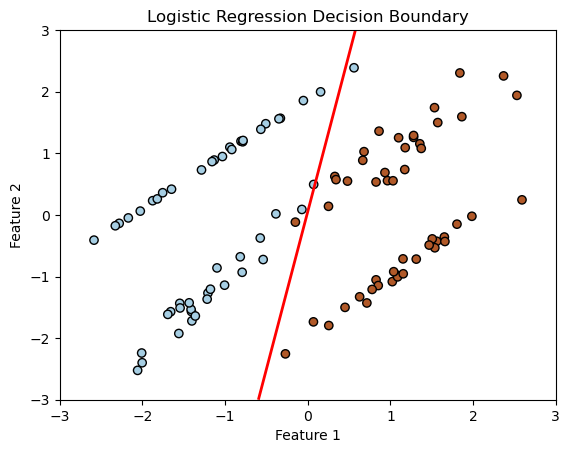

Accuracy: 0.95
Confusion Matrix:
 [[10  1]
 [ 0  9]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20



In [101]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = log_reg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Visualize the decision boundary
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z = log_reg_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

# Print results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', classification_rep)

In [102]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# Standardize the features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [104]:
# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = log_reg_model.predict(X_test_scaled)

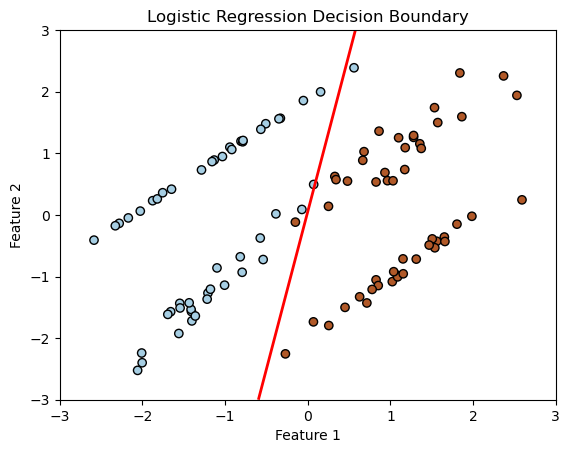

Accuracy: 0.95
Confusion Matrix:
 [[10  1]
 [ 0  9]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20



In [105]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Visualize the decision boundary
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z = log_reg_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

# Print results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', classification_rep)

## __Reference__

Grus, J 2015, Data Science from Scratch, O'Reilly Media

Müller, AC 2016, Introduction to Machine Learning with Python: A Guide for Data Scientists, O'Reilly Media

***

### End